In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_DA_CA = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Canada')]

df_DA_CA_explode = df_DA_CA.explode('job_skills')

df_DA_CA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
118,Data Analyst,"Actuarial and Advanced Analytics, New Grad Rot...",Canada,via BeBee Canada,Full-time,False,Canada,2023-10-31 13:37:11,False,False,Canada,None,NaN,NaN,Definity Financial Corporation,python,"{'cloud': ['bigquery'], 'programming': ['pytho..."
118,Data Analyst,"Actuarial and Advanced Analytics, New Grad Rot...",Canada,via BeBee Canada,Full-time,False,Canada,2023-10-31 13:37:11,False,False,Canada,None,NaN,NaN,Definity Financial Corporation,r,"{'cloud': ['bigquery'], 'programming': ['pytho..."
118,Data Analyst,"Actuarial and Advanced Analytics, New Grad Rot...",Canada,via BeBee Canada,Full-time,False,Canada,2023-10-31 13:37:11,False,False,Canada,None,NaN,NaN,Definity Financial Corporation,sql,"{'cloud': ['bigquery'], 'programming': ['pytho..."
118,Data Analyst,"Actuarial and Advanced Analytics, New Grad Rot...",Canada,via BeBee Canada,Full-time,False,Canada,2023-10-31 13:37:11,False,False,Canada,None,NaN,NaN,Definity Financial Corporation,go,"{'cloud': ['bigquery'], 'programming': ['pytho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784498,Data Analyst,9682 - Junior Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-01-03 06:30:15,False,False,Canada,None,NaN,NaN,University of Waterloo,sas,"{'analyst_tools': ['sas', 'spss', 'excel'], 'p..."
784498,Data Analyst,9682 - Junior Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-01-03 06:30:15,False,False,Canada,None,NaN,NaN,University of Waterloo,sas,"{'analyst_tools': ['sas', 'spss', 'excel'], 'p..."
784498,Data Analyst,9682 - Junior Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-01-03 06:30:15,False,False,Canada,None,NaN,NaN,University of Waterloo,r,"{'analyst_tools': ['sas', 'spss', 'excel'], 'p..."
784498,Data Analyst,9682 - Junior Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-01-03 06:30:15,False,False,Canada,None,NaN,NaN,University of Waterloo,spss,"{'analyst_tools': ['sas', 'spss', 'excel'], 'p..."


In [8]:
df_DA_CA_explode['job_posted_month_no'] = df_DA_CA_explode['job_posted_date'].dt.month

In [10]:
df_DA_CA_pivot = df_DA_CA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

<Axes: xlabel='job_posted_month_no'>

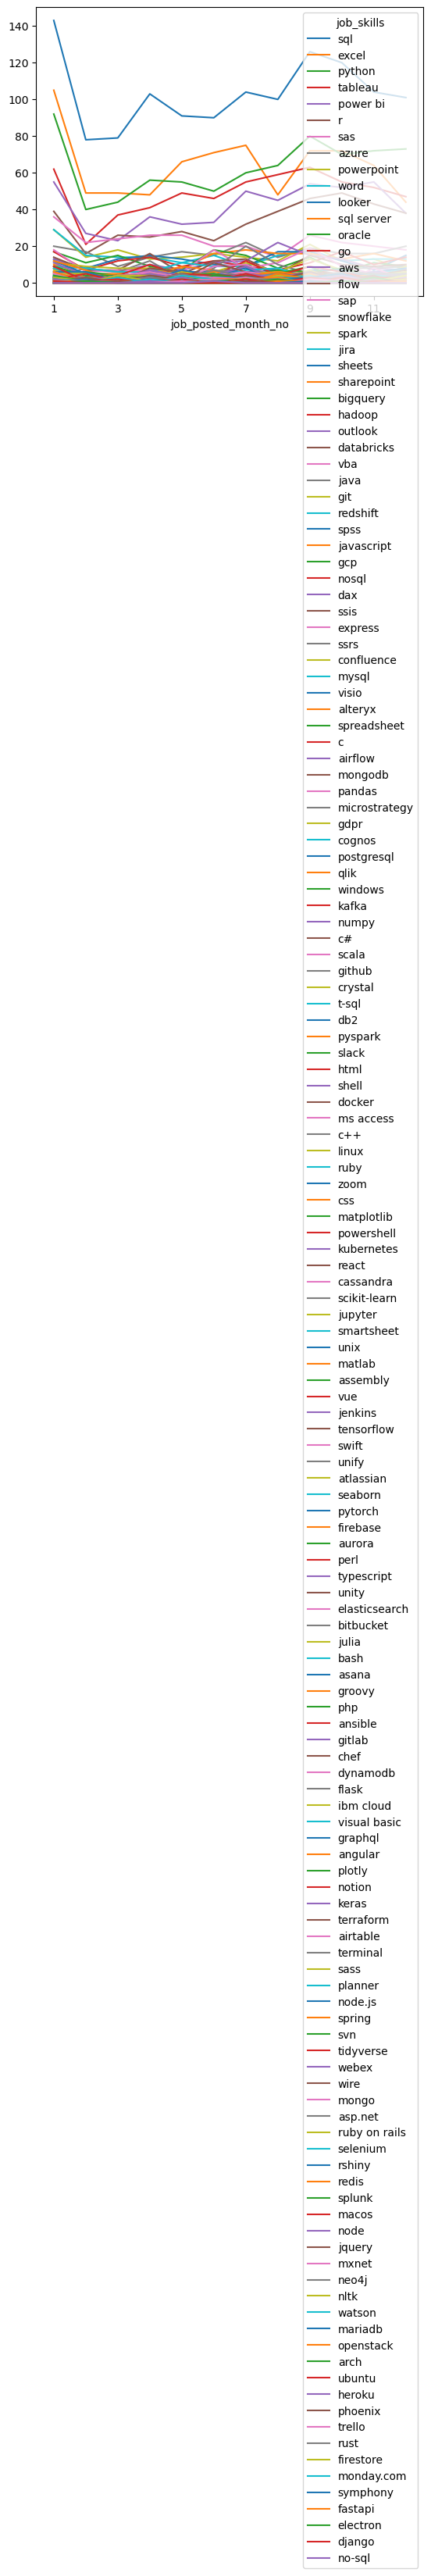

In [29]:
df_DA_CA_pivot.loc['Total'] = df_DA_CA_pivot.sum()

df_DA_CA_pivot = df_DA_CA_pivot[df_DA_CA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_CA_pivot = df_DA_CA_pivot.drop('Total')

df_DA_CA_pivot.plot(kind='line')

In [34]:
DA_totals = df_DA_CA_explode.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     1091
2      531
3      564
4      681
5      648
6      699
7      836
8      699
9      879
10     769
11     710
12     716
dtype: int64

In [40]:
df_DA_CA_percent = df_DA_CA_pivot.div(DA_totals/100, axis=0)

df_plot = df_DA_CA_percent.iloc[:, :5]



In [41]:
!conda install seaborn -y

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [42]:
import seaborn as sns

In [54]:
df_plot.reset_index()
df_plot

job_skills,sql,excel,python,tableau,power bi
job_posted_month_no,,,,,
1,13.107241,9.624198,8.432631,5.682860,5.041247
2,14.689266,9.227872,7.532957,3.954802,5.084746
3,14.007092,8.687943,7.801418,6.560284,4.078014
4,15.124816,7.048458,8.223201,6.020558,5.286344
5,14.043210,10.185185,8.487654,7.561728,4.938272
6,12.875536,10.157368,7.153076,6.580830,4.721030
7,12.440191,8.971292,7.177033,6.578947,5.980861
8,14.306152,6.866953,9.155937,8.440629,6.437768
9,14.334471,8.191126,9.101251,7.167235,6.143345


<Axes: xlabel='job_posted_month_no'>

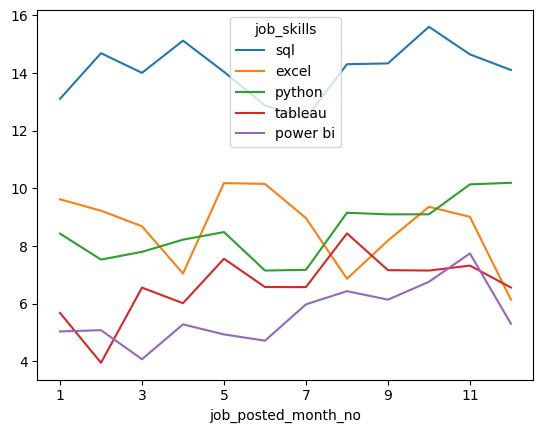

In [58]:
df_plot.plot(kind='line')

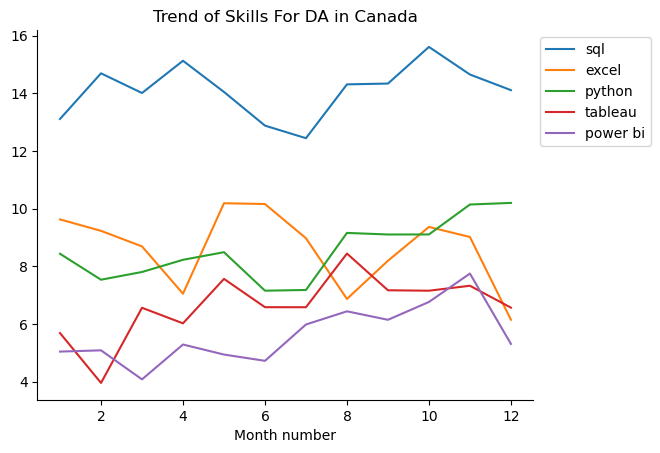

In [76]:
sns.lineplot(data=df_plot, dashes=False)
sns.despine()


plt.title('Trend of Skills For DA in Canada')
plt.xlabel('Month number')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

